## **Data Preparation and Processing**


___

In [7]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler



In [8]:
train_labels =[]
train_samples = []


**Example Data**

- An Experimental Drug was tested on individuals from ages 13 to 100 in a clinical trial
- The trial had 2100 participants. Half were under 65 years old and half were 65 years or older
- Around 95% of patients 65 years or older experienced side effects
- Around 95% of patients under 65 years experienced no side effects

In [9]:
for i in range(50):
    #The -5% of younger individuals who did experience side effects 
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    #The 5% of older individuals who did not experience side effects
    random_older = randint(64,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [10]:
for i in train_samples:
    print(i)

41
64
43
66
49
65
14
75
60
72
26
64
53
92
51
98
62
78
61
69
52
65
62
80
24
98
48
93
18
100
25
73
13
68
13
68
37
95
28
67
19
67
17
97
31
95
64
81
24
85
20
93
49
97
50
98
19
87
28
92
45
76
27
67
32
73
36
85
61
100
25
93
50
100
64
85
24
83
39
70
19
68
21
84
54
77
45
79
50
84
13
70
56
88
30
75
27
99
15
91
46
85
42
97
24
66
34
91
51
100
20
85
64
82
46
97
30
83
20
93
40
74
34
76
45
90
27
100
28
99
45
85
31
78
40
68
21
81
62
85
34
79
53
90
64
87
61
84
21
79
20
80
22
80
38
79
41
91
26
76
14
77
30
74
29
89
38
87
47
69
57
84
40
98
29
67
28
84
27
86
20
93
37
72
50
100
42
87
49
99
25
79
47
76
16
71
58
81
20
97
43
80
41
94
37
69
44
87
16
88
26
74
46
97
42
82
50
96
18
78
50
70
58
76
24
92
41
72
49
91
18
78
35
94
46
97
42
96
32
83
48
77
32
66
30
98
33
83
18
81
28
97
60
72
54
78
42
81
17
66
47
86
50
90
48
94
40
80
29
97
23
69
57
79
61
69
64
82
30
74
47
96
46
71
17
74
22
79
55
95
33
75
34
83
49
90
56
66
18
72
27
88
48
96
16
92
51
92
64
98
42
67
24
92
15
93
24
76
35
83
20
91
44
77
23
91
47
77
13
95
45
8

- **Converting data into numpy array expected by the fit function**
- **Then shuffle the arrays to remove any order that was imposed on the data during the creation process**

In [11]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

- **Scaling data from 13-64 to 0-1**
- **Reshaping the data as a technical requirement just since the fit_transform() function doesn't accept 1D data by default.**

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [13]:
for i in scaled_train_samples:
    print(i)

[0.7816092]
[0.36781609]
[0.64367816]
[0.08045977]
[0.79310345]
[0.08045977]
[0.52873563]
[0.40229885]
[0.45977011]
[0.45977011]
[0.20689655]
[0.95402299]
[0.4137931]
[0.20689655]
[0.89655172]
[0.5862069]
[0.97701149]
[0.72413793]
[0.43678161]
[0.16091954]
[0.12643678]
[0.67816092]
[0.25287356]
[0.68965517]
[0.81609195]
[0.35632184]
[0.11494253]
[0.18390805]
[0.5862069]
[0.37931034]
[0.85057471]
[0.09195402]
[0.32183908]
[0.7816092]
[0.66666667]
[0.64367816]
[0.82758621]
[0.5862069]
[0.8045977]
[0.79310345]
[0.32183908]
[0.43678161]
[0.79310345]
[0.77011494]
[0.93103448]
[0.62068966]
[0.5862069]
[0.18390805]
[0.49425287]
[0.73563218]
[0.63218391]
[0.90804598]
[0.02298851]
[0.73563218]
[0.50574713]
[0.16091954]
[0.36781609]
[0.95402299]
[0.18390805]
[0.33333333]
[0.71264368]
[0.27586207]
[0.5862069]
[0.8045977]
[0.89655172]
[0.05747126]
[0.54022989]
[0.85057471]
[0.82758621]
[0.67816092]
[0.42528736]
[0.65517241]
[0.90804598]
[0.40229885]
[0.36781609]
[0.1954023]
[0.13793103]
[0.7586206

## **Simple tf.keras Sequential Model**

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy


- **First Hidden Layer** is Dense layer and input shape of data is specified in it. This type of layer is our standard fully-connected or densely-connected neural network layer.
- **Last hidden layer** is output layer

- **Softmax** is an activation function that scales numbers/logits into probabilities.
- **ReLU (Rectified Linear Activation)** is a widely used activation function in neural networks. It introduces non-linearity, aiding in complex pattern recognition. By avoiding vanishing gradient issues, ReLU accelerates training convergence.

In [15]:
model = Sequential([
    Dense(units = 16, input_shape = (1,), activation = 'relu'),
    Dense(units = 32, activation ='relu'),
    Dense(units = 2, activation ='softmax')

])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**COMPILING THE MODEL**
- Adam : an adaptive learning rate optimization algorithm that's been designed specifically for training deep neural networks.
- Categorical_crossentropy and Sparse_categorical cross entropy are loss functions for multi class classification. 
The main difference is the former one has the output in the form of one hot encoded vectors whereas the latter has it in integers.

In [17]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

- **Validation Split** splits the training data and keeps some data for validation. it is important to shuffle the training data before this step

- This also helps us see whether or not the model is overfitting. Overfitting occurs when the model only learns the specifics of the training data and is unable to generalize well on data that it wasn't trained on.

In [18]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split = 0.1 ,batch_size=10, epochs= 30, shuffle =True, verbose=2)

Epoch 1/30
189/189 - 2s - loss: 0.6850 - accuracy: 0.5566 - val_loss: 0.6645 - val_accuracy: 0.5905 - 2s/epoch - 11ms/step
Epoch 2/30
189/189 - 1s - loss: 0.6547 - accuracy: 0.6000 - val_loss: 0.6306 - val_accuracy: 0.6762 - 513ms/epoch - 3ms/step
Epoch 3/30
189/189 - 1s - loss: 0.6232 - accuracy: 0.6905 - val_loss: 0.5955 - val_accuracy: 0.7333 - 746ms/epoch - 4ms/step
Epoch 4/30
189/189 - 1s - loss: 0.5879 - accuracy: 0.7497 - val_loss: 0.5599 - val_accuracy: 0.7810 - 660ms/epoch - 3ms/step
Epoch 5/30
189/189 - 1s - loss: 0.5499 - accuracy: 0.7952 - val_loss: 0.5212 - val_accuracy: 0.8476 - 720ms/epoch - 4ms/step
Epoch 6/30
189/189 - 1s - loss: 0.5090 - accuracy: 0.8381 - val_loss: 0.4852 - val_accuracy: 0.9000 - 547ms/epoch - 3ms/step
Epoch 7/30
189/189 - 0s - loss: 0.4716 - accuracy: 0.8614 - val_loss: 0.4488 - val_accuracy: 0.9048 - 370ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.4365 - accuracy: 0.8778 - val_loss: 0.4159 - val_accuracy: 0.9143 - 416ms/epoch - 2ms/step
Ep

### **Creating test set same way we created a training set**

In [19]:
test_labels =[]
test_samples = []


**Example Data**

- An Experimental Drug was tested on individuals from ages 13 to 100 in a clinical trial
- The trial had 2100 participants. Half were under 65 years old and half were 65 years or older
- Around 95% of patients 65 years or older experienced side effects
- Around 95% of patients under 65 years experienced no side effects

In [20]:
for i in range(10):
    #The -5% of younger individuals who did experience side effects 
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    #The 5% of older individuals who did not experience side effects
    random_older = randint(64,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

- **Converting data into numpy array expected by the fit function**
- **Then shuffle the arrays to remove any order that was imposed on the data during the creation process**

In [21]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

- **Scaling data from 13-64 to 0-1**
- **Reshaping the data as a technical requirement just since the fit_transform() function doesn't accept 1D data by default.**

In [22]:
# scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

#### **Predict**

In [23]:
predictions = model.predict(x =scaled_test_samples, batch_size=10, verbose=2)

42/42 - 0s - 437ms/epoch - 10ms/step


- Indicates likelihood of [not having side effects, having side effects]

In [24]:
for i in predictions:
    print(i)

[0.9660085 0.0339915]
[0.36564577 0.6343542 ]
[0.02387783 0.97612214]
[0.03254366 0.96745634]
[0.9735972  0.02640273]
[0.40316895 0.5968311 ]
[0.52091634 0.47908357]
[0.12143397 0.878566  ]
[0.9724745  0.02752542]
[0.59893817 0.40106183]
[0.9724745  0.02752542]
[0.97524685 0.02475318]
[0.9689654  0.03103454]
[0.03059642 0.9694036 ]
[0.93619406 0.06380588]
[0.95891756 0.04108248]
[0.09248029 0.90751976]
[0.97504497 0.02495504]
[0.23404686 0.7659532 ]
[0.04421205 0.95578796]
[0.12143397 0.878566  ]
[0.9185226  0.08147734]
[0.12143397 0.878566  ]
[0.97160226 0.02839774]
[0.32968572 0.6703143 ]
[0.9660085 0.0339915]
[0.73801947 0.2619806 ]
[0.10550632 0.89449364]
[0.73801947 0.2619806 ]
[0.23404686 0.7659532 ]
[0.9660085 0.0339915]
[0.9724745  0.02752542]
[0.97533673 0.02466324]
[0.02387783 0.97612214]
[0.48127124 0.51872873]
[0.04159667 0.9584033 ]
[0.02387783 0.97612214]
[0.36564577 0.6343542 ]
[0.9744099  0.02559009]
[0.9660085 0.0339915]
[0.05632202 0.94367796]
[0.9716727  0.02832726]


[0.05980547 0.9401945 ]
[0.97524685 0.02475318]
[0.9081016  0.09189839]
[0.97524685 0.02475318]
[0.879498   0.12050194]
[0.9689654  0.03103454]
[0.04421205 0.95578796]
[0.10550632 0.89449364]
[0.1394031 0.8605969]
[0.02876225 0.9712378 ]
[0.12143397 0.878566  ]
[0.9747157  0.02528435]
[0.32968572 0.6703143 ]
[0.09248029 0.90751976]
[0.08043582 0.9195641 ]
[0.9721868  0.02781326]
[0.06348989 0.93651015]
[0.6722483  0.32775173]
[0.9724745  0.02752542]
[0.08043582 0.9195641 ]
[0.03680337 0.9631967 ]
[0.8416234  0.15837659]
[0.04159667 0.9584033 ]
[0.08527593 0.9147241 ]
[0.97466576 0.02533419]
[0.02387783 0.97612214]
[0.07584769 0.9241523 ]
[0.9689654  0.03103454]
[0.9752202  0.02477987]
[0.04421205 0.95578796]
[0.2636787 0.7363213]
[0.9730416  0.02695839]
[0.02540869 0.9745914 ]
[0.48127124 0.51872873]
[0.05980547 0.9401945 ]
[0.04421205 0.95578796]
[0.08527593 0.9147241 ]
[0.02876225 0.9712378 ]
[0.9735972  0.02640273]
[0.9185226  0.08147734]
[0.97504497 0.02495504]
[0.18198921 0.818010

In [25]:
rounded_predictions = np.argmax(predictions, axis = -1)

In [26]:
for i in rounded_predictions:
    print(i)

0
1
1
1
0
1
0
1
0
0
0
0
0
1
0
0
1
0
1
1
1
0
1
0
1
0
0
1
0
1
0
0
0
1
1
1
1
1
0
0
1
0
0
0
0
0
1
1
0
1
1
0
0
0
0
1
1
0
0
1
0
0
0
1
1
1
0
1
0
0
0
0
1
0
0
1
1
0
1
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
0
0
0
1
0
0
0
0
0
1
0
1
1
1
0
0
0
0
0
1
1
1
1
1
0
1
1
1
0
1
0
0
1
1
0
1
1
0
1
1
0
0
1
1
0
1
1
1
1
1
1
0
0
0
1
0
0
1
0
1
1
1
0
1
0
0
0
1
0
1
1
0
1
0
1
0
0
0
0
0
1
1
0
0
1
0
1
0
0
0
0
1
1
1
0
0
0
1
1
0
0
0
0
1
0
1
0
1
1
0
0
0
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
1
0
0
0
1
0
0
1
1
0
1
0
1
0
1
1
0
1
0
1
1
0
1
1
1
0
1
1
0
1
0
1
0
1
1
1
1
0
0
0
1
0
0
1
0
0
1
1
1
1
0
0
0
1
1
0
0
0
0
0
0
1
0
1
0
1
1
0
0
1
0
1
1
0
1
0
0
0
1
0
0
1
0
1
1
1
0
1
1
0
0
1
1
1
1
0
0
1
0
1
1
1
0
1
1
1
1
1
1
0
0
0
0
1
1
1
1
0
0
1
0
1
0
1
1
1
0
0
1
1
1
0
1
1
0
0
0
1
1
0
0
1
0
1
0
1
1
0
0
1
1
0
0
0
1
0
1
0
0
1
1
1
1
1
1
1
0
1
0
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
0
1
0
0
1
1
1


#### **Confusion Matrix**

- **%matplotlib inline** in order to display graphs inline



In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools


- Passing true labels as well as the predicted labels
- Using plot_confusion_matrix function available from scikit_learn website

In [28]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [29]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

- Adding Labels 

Confusion matrix, without normalization
[[197  13]
 [  9 201]]


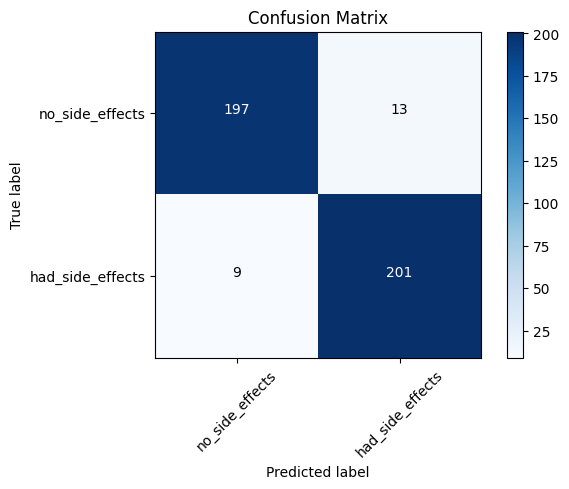

In [30]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### **Saving and Loading a Model**

#### **1. model.save()**

- Checks first to see if file exists already
- If not then model is saved to the disk 


**This save function also saves:**
- Architecture of the model, allowing to recreate the model
- The weights of the model
- the training configuration (loss, optimizer)
- The state of the optimizer allowing training to resume from exactly where we left off

In [1]:
import os.path

model_path = 'C:/Users/Hp Pavilion/Desktop/College/Coding/Python/Industrial Training/Machine Learning/models/medical_trial_model.h5'

if os.path.isfile(model_path) is False:
    model.save(model_path)

In [2]:
from tensorflow.keras.models import load_model
new_model = load_model(model_path)

In [3]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
new_model.get_weights()

[array([[ 0.54871124, -0.24986085,  0.3972095 , -0.37701917, -0.1356343 ,
         -0.0525409 , -0.2520104 , -0.394556  ,  0.46504036,  0.37714705,
         -0.45639777,  0.6786168 ,  0.15563668,  0.5156799 ,  0.1562787 ,
         -0.1375745 ]], dtype=float32),
 array([-0.1580846 ,  0.        ,  0.2362531 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.14639166, -0.11674487,
         0.        , -0.15805651,  0.1322313 , -0.13429958, -0.06116705,
         0.        ], dtype=float32),
 array([[ 0.27589843,  0.18575051, -0.19912751,  0.16690455,  0.2924575 ,
          0.29044345, -0.12873691,  0.5013206 , -0.3878926 ,  0.3366505 ,
         -0.23905055, -0.09407565, -0.2953544 , -0.02623785, -0.03764269,
          0.07037706,  0.32025227,  0.14579338,  0.03040008,  0.21903402,
         -0.53174144, -0.31495538,  0.17209156, -0.03287955, -0.27865022,
          0.01858686, -0.08772919,  0.03077898, -0.41008458, -0.31041625,
          0.4176615 , -0.19699167],
 

In [6]:
new_model.optimizer

#### **2. model.to_json()**
#### **3. model.save_weights()** : Do if required
- Saves only architecture of the model, not its weights or training configuration
- Save only weights and not the architecture of the model

In [31]:
json_string = model.to_json()

In [35]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 1]}}, {"module": "keras.layers", "class_name": "Dense", "config": {

- Model reconstruction from JSON String

In [33]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)


In [36]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **CONVOLUTION NEURAL NETWORKS**



In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import warnings
import matplotlib.pyplot as plt



warnings.simplefilter(action = 'ignore', category = 'FutureWarning')
%matplotlib inline

- Organising data into train, validation and test sets

In [ ]:

# Create the directory structure if it doesn't exist
os.makedirs('PetImages/train/dog', exist_ok=True)
os.makedirs('PetImages/train/cat', exist_ok=True)
os.makedirs('PetImages/valid/dog', exist_ok=True)
os.makedirs('PetImages/valid/cat', exist_ok=True)
os.makedirs('PetImages/test/dog', exist_ok=True)
os.makedirs('PetImages/test/cat', exist_ok=True)

# Function to move random files from source to destination directory
def move_random_files(source_dir, destination_dir, num_files):
    all_files = os.listdir(source_dir)
    random_files = random.sample(all_files, num_files)
    
    for file_name in random_files:
        source_path = os.path.join(source_dir, file_name)
        destination_path = os.path.join(destination_dir, file_name)
        shutil.move(source_path, destination_path)

# Move random Cat images to the Cat training directory
move_random_files('PetImages/Cat', 'PetImages/train/cat', 500)

# Move random Dog images to the Dog training directory
move_random_files('PetImages/Dog', 'PetImages/train/dog', 500)

# Move random Cat images to the Cat validation directory
move_random_files('PetImages/Cat', 'PetImages/valid/cat', 100)

# Move random Dog images to the Dog validation directory
move_random_files('PetImages/Dog', 'PetImages/valid/dog', 100)

# Move random Cat images to the Cat test directory
move_random_files('PetImages/Cat', 'PetImages/test/cat', 50)

# Move random Dog images to the Dog test directory
move_random_files('PetImages/Dog', 'PetImages/test/dog', 50)


In [3]:
train_path = 'PetImages/train'
valid_path = 'PetImages/valid'
test_path = 'PetImages/test'

- Using **Keras' ImageDataGenerator Class** to create batches of data from the train, valid, and test directories.

- **ImageDataGenerator.flow_from_directory()** creates a DirectoryIterator, which generates batches of normalized tensor image data from the respective data directories.

- **vgg16.preprocess_input** : The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel.

- **shuffle=False only for test_batches** That's because, later when we plot the evaluation results from the model to a confusion matrix, we'll need to able to access the unshuffled labels for the test set. By default, the data sets are shuffled.



In [8]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = train_path, target_size = (224,224), classes = ['cat', 'dog'], batch_size = 10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = valid_path, target_size = (224,224), classes = ['cat', 'dog'], batch_size = 10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = test_path, target_size = (224,224), classes = ['cat', 'dog'], batch_size = 10, shuffle = False)

Found 1000 images belonging to 2 classes.


Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


- Generate a batch of images and labels from the training set.

In [9]:
imgs, labels = next(train_batches)

- Function to plot images in form of a grid with 1 row and 10 columns where images are placed in same row. 
- From tensorflow docs

In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

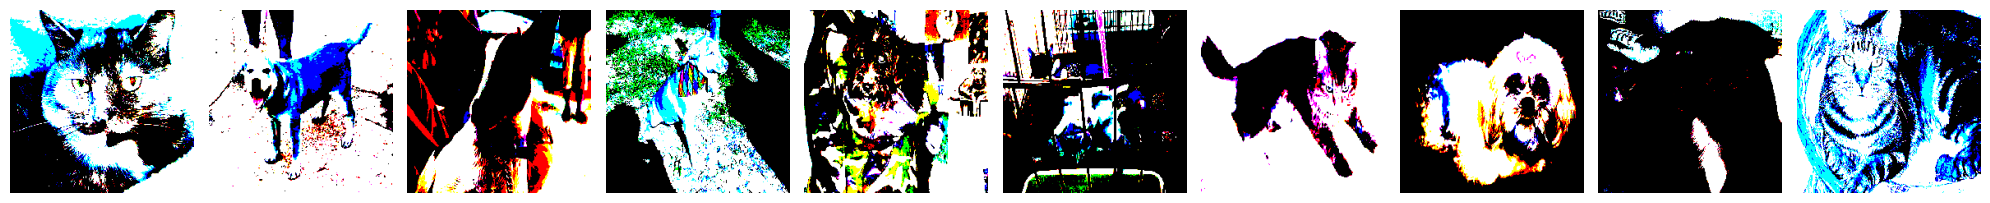

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [11]:
plotImages(imgs)
print(labels)

### **Build and Train a CNN**

___

- kernel size of 3x3 is generally a very common size to use
- zero-padding by specifying padding = 'same'.

-  **Max pooling** : In general, max pooling is added after a convolutional layer.  Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network.

- **Conv2D** : Convolutional layer called that we use to train image data in a Sequential model?

**ADD MORE INFORMATION AFTER STUDYING FUNDAMENTALS**

___

In [40]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units = 2, activation = 'softmax')
])

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 200704)            0         
                                                                 
 dense_2 (Dense)             (None, 2)                

In [42]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

-  DirectoryIterator is indeed an infinitely repeating data set, as the batches of data generated by the iterator will continue to come infinitely as long as we want them to.

-  **Steps per Epochs** : typically set to be equal to the number of samples in our training set divided by the batch size. For example, if we have 100 training images, and our batch size is 5, then we would set steps_per_epoch=20

- **validation_steps** : if we are also passing in validation data to the model.

- when we use the model for inference by calling predict() on the model and passing in the test set, we need to also specify the parameter called steps

In [43]:
model.fit(
    x = train_batches,
    validation_data = valid_batches,
    epochs = 10, 
    verbose = 2
)

# # This is updated
# model.fit(x=train_batches,
#     steps_per_epoch=len(train_batches),
#     validation_data=valid_batches,
#     validation_steps=len(valid_batches),
#     epochs=10,
#     verbose=2
# )

Epoch 1/10


100/100 - 44s - loss: 38.8764 - accuracy: 0.5810 - val_loss: 0.7890 - val_accuracy: 0.6150 - 44s/epoch - 436ms/step
Epoch 2/10
100/100 - 39s - loss: 0.5753 - accuracy: 0.7130 - val_loss: 0.7082 - val_accuracy: 0.5750 - 39s/epoch - 391ms/step
Epoch 3/10
100/100 - 47s - loss: 0.3973 - accuracy: 0.8670 - val_loss: 0.7995 - val_accuracy: 0.6250 - 47s/epoch - 468ms/step
Epoch 4/10
100/100 - 54s - loss: 0.1891 - accuracy: 0.9440 - val_loss: 0.8422 - val_accuracy: 0.6500 - 54s/epoch - 536ms/step
Epoch 5/10
100/100 - 47s - loss: 0.0627 - accuracy: 0.9880 - val_loss: 1.0603 - val_accuracy: 0.6150 - 47s/epoch - 467ms/step
Epoch 6/10
100/100 - 47s - loss: 0.0276 - accuracy: 0.9960 - val_loss: 1.1652 - val_accuracy: 0.6250 - 47s/epoch - 465ms/step
Epoch 7/10
100/100 - 47s - loss: 0.0220 - accuracy: 0.9960 - val_loss: 1.3003 - val_accuracy: 0.6350 - 47s/epoch - 468ms/step
Epoch 8/10
100/100 - 46s - loss: 0.0255 - accuracy: 0.9980 - val_loss: 1.3529 - val_accuracy: 0.6250 - 46s/epoch - 462ms/step
Ep

___

With accuracy reaching 100% and loss nearing 0, however, by comparing these results to the validation metrics, we can see that our model is vastly **overfitting** to the training data.

___

### **Predict**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


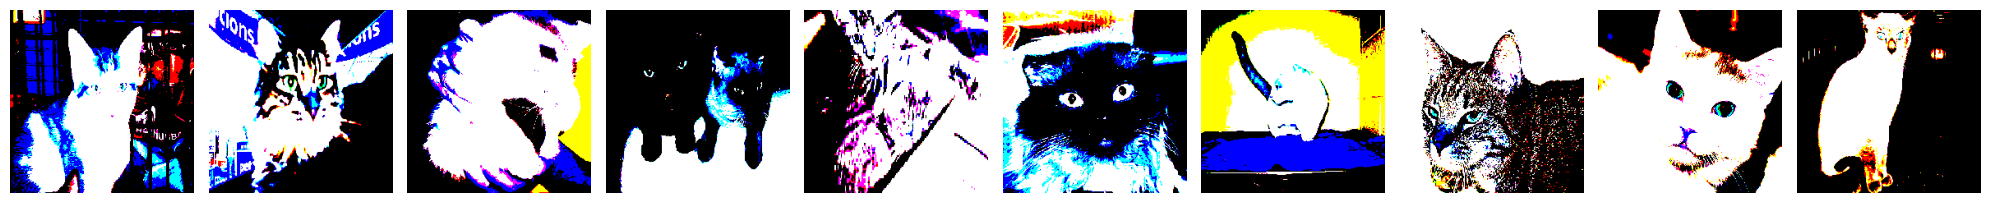

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [44]:
test_images, test_labels = next(test_batches)
plotImages(test_images)
print(test_labels)

In [45]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

- **Steps** specifies how many batches to yield from the test set before declaring one prediction round complete.

In [46]:
predictions = model.predict(x = test_batches, verbose= 0)

In [47]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

- Transform the one-hot encoded predicted labels to be in the same format as the true labels :  y_pred=np.argmax(predictions, axis=-1)

In [48]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [49]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [50]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[27 23]
 [22 28]]


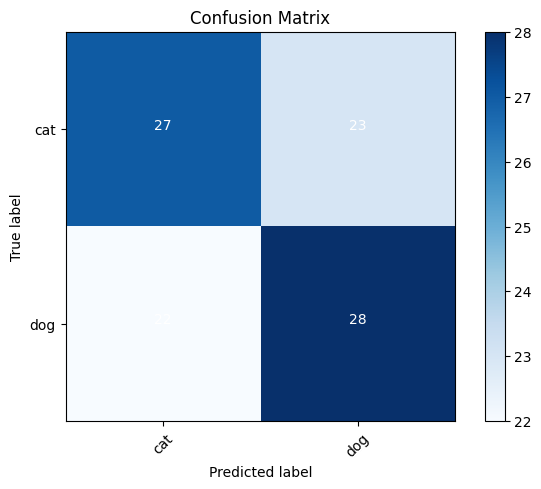

In [51]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm = cm, classes = cm_plot_labels, title= 'Confusion Matrix')

## **Building Fine-Tuned VGG16 Model**


___

- **Download Model**

In [52]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 56s 0us/step


In [53]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [54]:
type(vgg16_model)

keras.src.engine.functional.Functional

In [55]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

- Since we're only going to be classifying two categories, cats and dogs, we need to modify this model in order for it to do what we want it to do, which is to only classify cats and dogs.

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [57]:
for layer in model.layers:
    layer.trainable = False

In [58]:
model.add(Dense(units=2, activation='softmax'))

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

### **Train the Fine Tuned VGG16 Model**

In [60]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [61]:
model.fit(x = train_batches, validation_data=valid_batches, epochs=5, verbose =2)

Epoch 1/5
100/100 - 328s - loss: 0.1267 - accuracy: 0.9550 - val_loss: 0.0404 - val_accuracy: 0.9750 - 328s/epoch - 3s/step
Epoch 2/5
100/100 - 321s - loss: 0.0134 - accuracy: 0.9940 - val_loss: 0.0290 - val_accuracy: 0.9800 - 321s/epoch - 3s/step
Epoch 3/5
100/100 - 308s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000 - 308s/epoch - 3s/step
Epoch 4/5
100/100 - 269s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000 - 269s/epoch - 3s/step
Epoch 5/5
100/100 - 268s - loss: 8.8208e-04 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000 - 268s/epoch - 3s/step


### **Predict using the fine tuned VGG16 model**

In [62]:
predictions = model.predict(x=test_batches, verbose=2)

10/10 - 27s - 27s/epoch - 3s/step


In [67]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [63]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=1))

In [65]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[47  3]
 [ 3 47]]


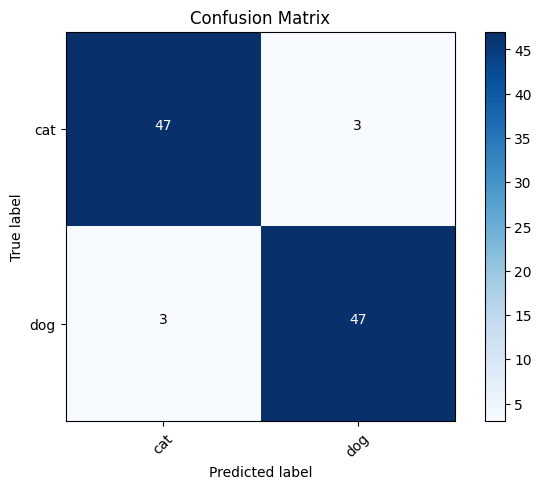

In [66]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## **MOBILE NET**

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import  Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import shutil
import random
import matplotlib.pyplot as plt
import os

%matplotlib inline


- **Mobile Nets** : Only 17Mb compared to VGG16 which is 500+ Mb

In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()

- **prepare_image()**:  accepts an image file, and processes the image to get it in a format that the model expects.
- **np.expand_dims** can be used to add a new batch dimension to your data, making it compatible with the model's input requirements.
- **tf.keras.applications.mobilenet.preprocess_input()** : Scales pixel values in image data to be between -1 and 1


In [4]:
def prepare_image(file):
    img_path = './MobileNet-samples/'
    img = image.load_img(img_path + file, target_size = (224,224))
    img_array = image.img_to_array(img)
    img_array_extended_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_extended_dims)

- Displaying the image and using the model to predict the image outcome

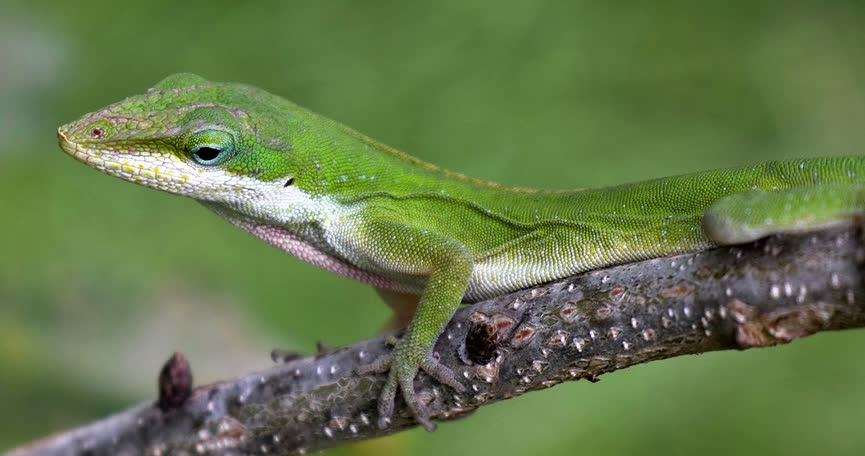

In [5]:
from IPython.display import Image
Image(filename = './MobileNet-samples/1.JPG', width = 300, height = 200)

In [6]:
preprocessed_image = prepare_image('1.JPG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 1s 1s/step


[[('n01682714', 'American_chameleon', 0.6527736),
  ('n01693334', 'green_lizard', 0.18930098),
  ('n01687978', 'agama', 0.13809566),
  ('n01689811', 'alligator_lizard', 0.0136027),
  ('n01688243', 'frilled_lizard', 0.0043193167)]]

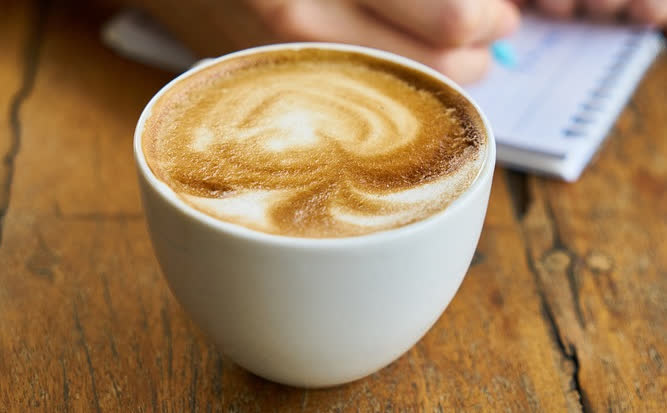

In [7]:
Image(filename = './MobileNet-samples/2.JPG', width = 300, height = 200)

In [8]:
preprocessed_image = prepare_image('2.JPG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 110ms/step


[[('n07920052', 'espresso', 0.97666264),
  ('n07930864', 'cup', 0.010093502),
  ('n07932039', 'eggnog', 0.008597032),
  ('n03063599', 'coffee_mug', 0.0036651576),
  ('n04597913', 'wooden_spoon', 0.0004963645)]]

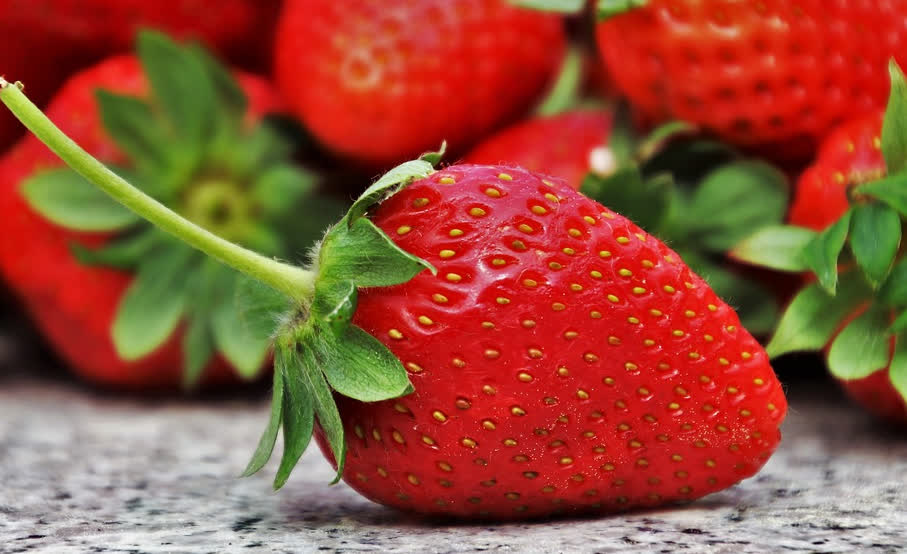

In [9]:
Image(filename = './MobileNet-samples/3.JPG', width = 300, height = 200)

In [10]:
preprocessed_image = prepare_image('3.JPG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 57ms/step


[[('n07745940', 'strawberry', 0.99999344),
  ('n07749582', 'lemon', 1.2431796e-06),
  ('n07747607', 'orange', 8.5952377e-07),
  ('n07753275', 'pineapple', 8.2739564e-07),
  ('n07768694', 'pomegranate', 6.2610576e-07)]]

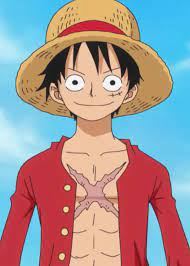

In [11]:
Image(filename = './MobileNet-samples/4.JPG', width = 300, height = 200)

In [12]:
preprocessed_image = prepare_image('4.JPG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 86ms/step


[[('n04259630', 'sombrero', 0.89877236),
  ('n04479046', 'trench_coat', 0.04345928),
  ('n06596364', 'comic_book', 0.031550255),
  ('n02817516', 'bearskin', 0.013240385),
  ('n03929855', 'pickelhaube', 0.0023630937)]]

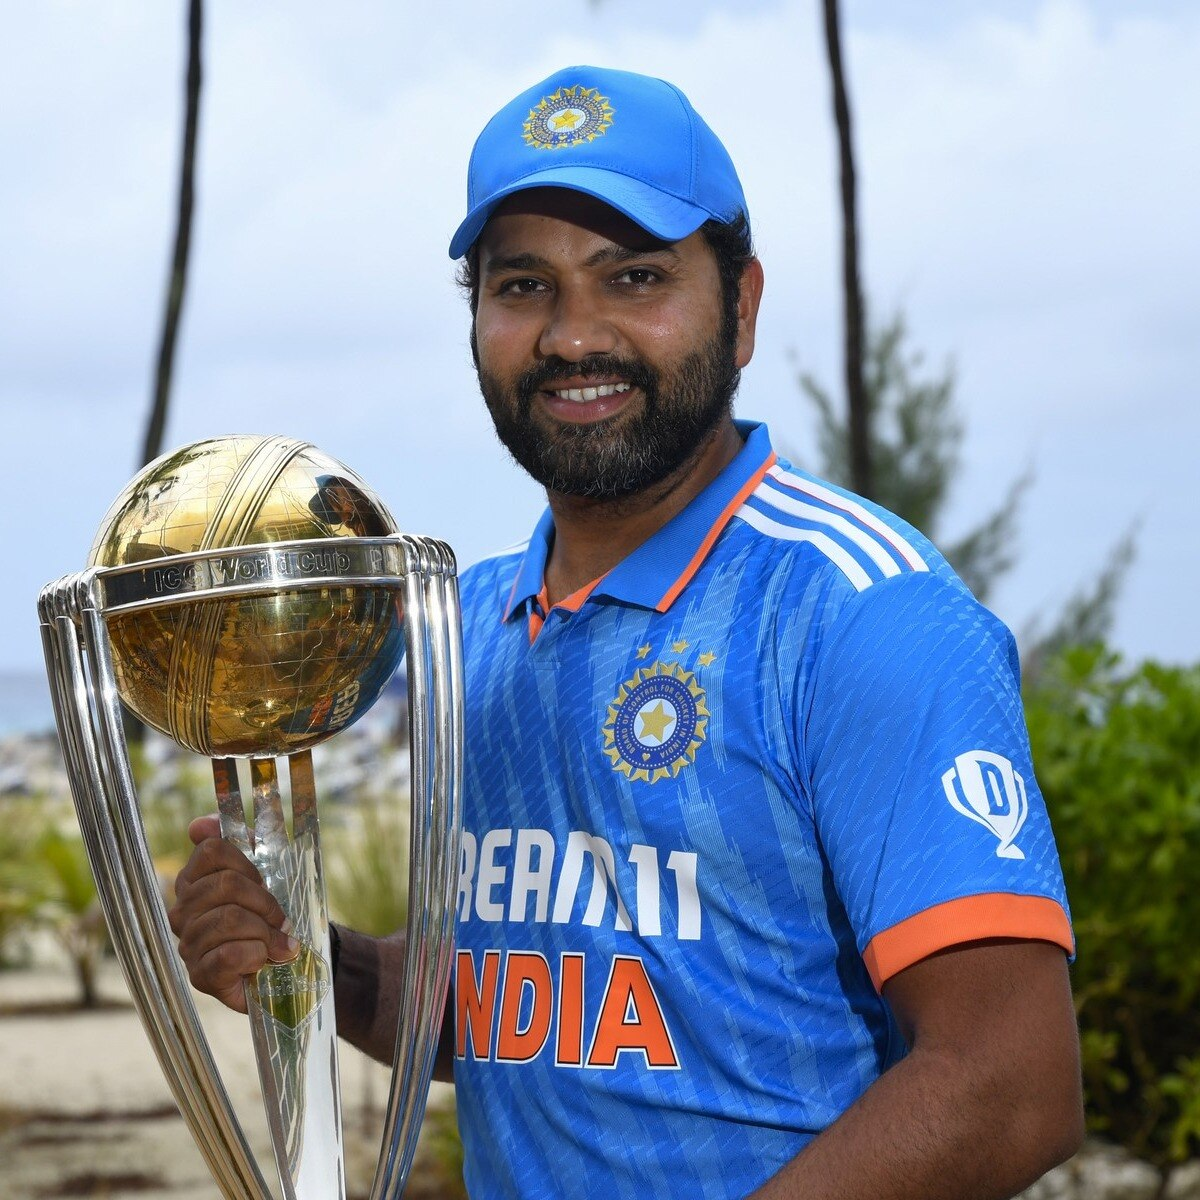

In [13]:
Image(filename = './MobileNet-samples/5.JPG', width = 300, height = 200)

In [14]:
preprocessed_image = prepare_image('5.JPG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 66ms/step


[[('n02799071', 'baseball', 0.43656415),
  ('n04192698', 'shield', 0.22023916),
  ('n04039381', 'racket', 0.18058111),
  ('n09835506', 'ballplayer', 0.026623093),
  ('n02514041', 'barracouta', 0.026424855)]]

### **Fine Tuning Mobile-Net on Sign Language Digits**

- **IMAGE PREPARATION**

- 10 Classes (Digits 0-9)
  - Class 0 : 205-208 images
  - Class 1 : 205-208 images
  - Class 2 : 205-208 images
  - Class 3 : 205-208 images
  - Class 4 : 205-208 images
  - Class 5 : 205-208 images
  - Class 6 : 205-208 images
  - Class 7 : 205-208 images
  - Class 8 : 205-208 images
  - Class 9 : 205-208 images



First, we create train, valid, and test directories.

We then move all class directories (0 - 9) with their respective images from Sign-Language-Digits-Datasetinto the train directory.

We then make class directories (0 - 9) for the valid and test data sets as well.
  

In [22]:
os.chdir('./Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../')

In [23]:
os.getcwd()

'c:\\Users\\Hp Pavilion\\Desktop\\College\\Coding\\Python\\Industrial Training\\Machine Learning'

In [24]:
train_path = './Sign-Language-Digits-Dataset/train/'
test_path = './Sign-Language-Digits-Dataset/test/'
valid_path = './Sign-Language-Digits-Dataset/valid/'

- mobilenet preprocessing function preprocesses the input and converts it into an output ranging between (-1,1)

In [25]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory = train_path, target_size = (224,224), batch_size = 10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory = valid_path, target_size = (224,224), batch_size = 10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory = test_path, target_size = (224,224), batch_size = 10, shuffle = False)


Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


### **Modifying the Model for the new dataset**

In [26]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [52]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

Note that the amount of layers that we choose to cut off when you're fine-tuning a model will vary for each scenario

- Taking all layers upto the 5th last layer. 

- Reshape our output from the global_average_pooling layer that we will pass to our output layer, which we're calling output. The output layer will just be a Dense layer with 10 output nodes for the ten corresponding classes

**Model constructor** is being used to create our model, that this is the model is being created with the Keras Functional API, not the Sequential API 
That's why this format that we're using to create the model may look a little different 

In [56]:
x = mobile.layers[-5].output
x = tf.keras.layers.Reshape(target_shape=(1024,))(x)
output = Dense(units = 10, activation = 'softmax')(x)

In [57]:
model = Model(inputs = mobile.input, outputs = output)

In [47]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

In [58]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [49]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

### **Training**

In [59]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics = ['accuracy'])


In [60]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose =2)

Epoch 1/10


172/172 - 84s - loss: 0.6162 - accuracy: 0.8236 - val_loss: 0.2199 - val_accuracy: 0.9500 - 84s/epoch - 488ms/step
Epoch 2/10
172/172 - 84s - loss: 0.1126 - accuracy: 0.9854 - val_loss: 0.1318 - val_accuracy: 0.9667 - 84s/epoch - 486ms/step
Epoch 3/10
172/172 - 99s - loss: 0.0570 - accuracy: 0.9924 - val_loss: 0.0859 - val_accuracy: 0.9700 - 99s/epoch - 578ms/step
Epoch 4/10
172/172 - 95s - loss: 0.0307 - accuracy: 0.9977 - val_loss: 0.0390 - val_accuracy: 0.9933 - 95s/epoch - 555ms/step
Epoch 5/10
172/172 - 99s - loss: 0.0210 - accuracy: 0.9982 - val_loss: 0.0462 - val_accuracy: 0.9900 - 99s/epoch - 573ms/step
Epoch 6/10
172/172 - 86s - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.0316 - val_accuracy: 0.9900 - 86s/epoch - 498ms/step
Epoch 7/10
172/172 - 83s - loss: 0.0152 - accuracy: 0.9982 - val_loss: 0.0398 - val_accuracy: 0.9833 - 83s/epoch - 480ms/step
Epoch 8/10
172/172 - 82s - loss: 0.0144 - accuracy: 0.9977 - val_loss: 0.0332 - val_accuracy: 0.9900 - 82s/epoch - 475ms/step
Epo

### **Predicting Sign Language Digits**

In [62]:
test_labels = test_batches.classes
test_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9])

In [63]:
predictions = model.predict(x=test_batches, verbose=0)

In [72]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [73]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [74]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 1 4 0]
 [0 0 0 0 0 0 0 0 0 5]]


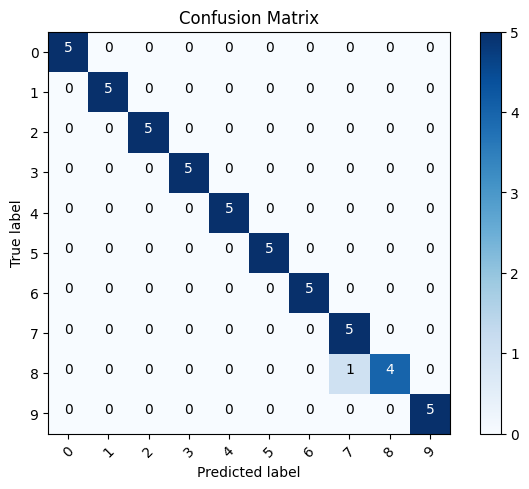

In [75]:
cm_plot_labels = ['0', '1',  '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title='Confusion Matrix')

## **DATA AUGMENTATION**

Data augmentation occurs when new data is created based on modifications of existing data. It will help us obtain more data for training. Maybe we have a small training set, or maybe we just want to make our training set larger



Data augmentation on images would include transformations like
  - Flipping the image vertically or horizontally
  - Rotating the image 
  - Zooming in or out of the image
  - Cropping the image
  - Varying the color of the image

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [2]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [5]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
height_shift_range=0.1, shear_range=0.1, zoom_range=0.1,
channel_shift_range = 10, horizontal_flip = True)

In [13]:
chosen_image = random.choice(os.listdir('./PetImages/train/dog'))

In [14]:
image_path = './PetImages/train/dog/' + chosen_image

In [15]:
assert os.path.isfile(image_path)

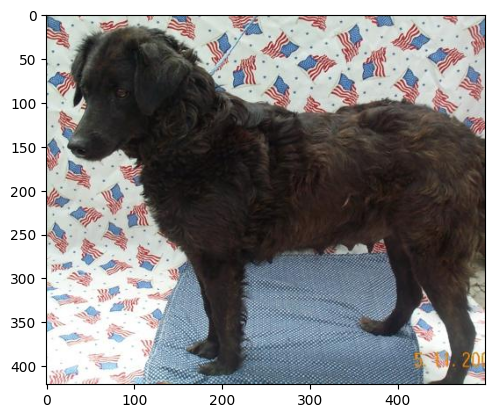

In [16]:
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])

- Generate batches of augmented images from existing image
- The flow() function takes numpy data and generates batches of augmented data.
- if images are not to be saved only give the image argument to the flow function


In [21]:
aug_iter = gen.flow(image, save_to_dir='./PetImages/aug_imgs/', save_prefix='aug-image-', save_format='jpeg')


- Get 10 Samples of augmented image

In [22]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

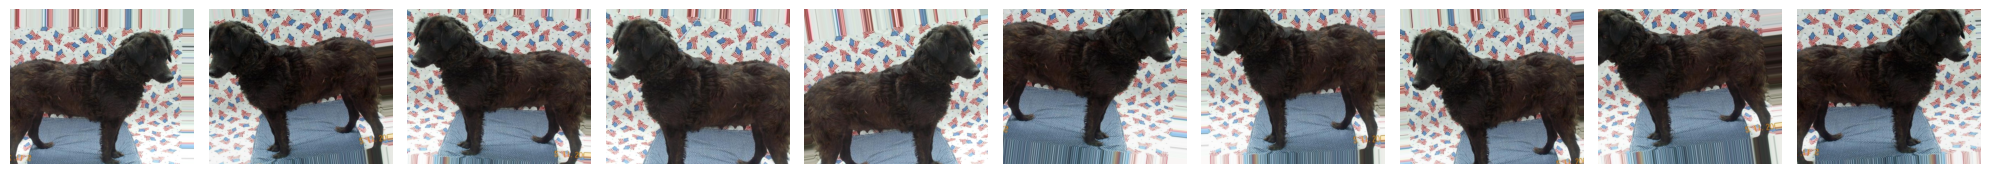

In [23]:
plotImages(aug_images)